# **CAPSTONE - Farming 2.0: IoT and Machine Learning Integration**

## **Team Members**

1.Chhavinder Singh - 0830731

2.Gireeshma Yarradoddi - 0858771

3.Osama Al Daqaq - 0847700

4.Amandeep Kaur - 0837476

# **HYPOTHESIS STATEMENTS**

In [1]:
pip install pandas numpy matplotlib seaborn scipy statsmodels scikit-learn mlxtend


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importing all the necessary libraries
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy.stats import t, pearsonr
    from scipy import stats
    import statsmodels.api as sm
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2
    from sklearn.model_selection import train_test_split, GridSearchCV
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    from sklearn.preprocessing import StandardScaler
    from mlxtend.feature_selection import SequentialFeatureSelector
    import warnings
    warnings.filterwarnings('ignore')
except ModuleNotFoundError as e:
    print(f"Missing library: {e.name}")
    print("Installing missing libraries...")
    import subprocess
    subprocess.run(['pip', 'install', 'pandas', 'numpy', 'matplotlib', 'seaborn', 'scipy', 'statsmodels', 'scikit-learn', 'mlxtend'], check=True)
    print("Installation complete. Please restart the script.")
    exit()

# Load the dataset
data = pd.read_csv("crop_yield.csv")  # Update this path to your local file path

# Display the first 5 rows of the data
print(data.head())

# Provide statistical summary
print(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

  Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0   West     Sandy   Cotton   897.077239            27.676966   
1  South      Clay     Rice   992.673282            18.026142   
2  North      Loam   Barley   147.998025            29.794042   
3  North     Sandy  Soybean   986.866331            16.644190   
4  South      Silt    Wheat   730.379174            31.620687   

   Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0            False             True            Cloudy              122   
1             True             True             Rainy              140   
2            False            False             Sunny              106   
3            False             True             Rainy              146   
4             True             True            Cloudy              110   

   Yield_tons_per_hectare  
0                6.555816  
1                8.527341  
2                1.127443  
3                6.517573  
4                7.24825

In [3]:
# Hypothesis 1: Regions with higher rainfall have higher crop yields
high_rainfall_yield = data[data['Rainfall_mm'] > data['Rainfall_mm'].median()]['Yield_tons_per_hectare']
low_rainfall_yield = data[data['Rainfall_mm'] <= data['Rainfall_mm'].median()]['Yield_tons_per_hectare']
# Perform a t-test
t_statistic, p_value = stats.ttest_ind(high_rainfall_yield, low_rainfall_yield, alternative='greater')
# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("Hypothesis 1: There is sufficient evidence to suggest that the average yield of crops in regions with higher rainfall is greater than the average yield of crops in regions with lower rainfall.")
else:
    print("Fail to reject the null hypothesis.")
    print("Hypothesis 1: There is not sufficient evidence to suggest that the average yield of crops in regions with higher rainfall is greater than the average yield of crops in regions with lower rainfall.")


# Hypothesis 2: The use of fertilizers leads to a significant increase in crop yield
fertilizer_yield = data[data['Fertilizer_Used'] > 0]['Yield_tons_per_hectare']
no_fertilizer_yield = data[data['Fertilizer_Used'] == 0]['Yield_tons_per_hectare']
# Perform a t-test
t_statistic, p_value = stats.ttest_ind(fertilizer_yield, no_fertilizer_yield, alternative='greater')
# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("Hypothesis 2: There is sufficient evidence to suggest that the average yield of crops with fertilizer use is greater than the average yield of crops without fertilizer use.")
else:
    print("Fail to reject the null hypothesis.")
    print("Hypothesis 2: There is not sufficient evidence to suggest that the average yield of crops with fertilizer use is greater than the average yield of crops without fertilizer use.")

# Hypothesis 3: Temperature impacts the number of days to harvest
# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(data['Temperature_Celsius'], data['Days_to_Harvest'])
# Print the results
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")
# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("Hypothesis 3: There is sufficient evidence to suggest a significant correlation between temperature and the number of days to harvest.")
else:
    print("Fail to reject the null hypothesis.")
    print("Hypothesis 3: There is not sufficient evidence to suggest a significant correlation between temperature and the number of days to harvest.")

T-statistic: 884.3147850549336
P-value: 0.0
Reject the null hypothesis.
Hypothesis 1: There is sufficient evidence to suggest that the average yield of crops in regions with higher rainfall is greater than the average yield of crops in regions with lower rainfall.
T-statistic: 492.8824865486214
P-value: 0.0
Reject the null hypothesis.
Hypothesis 2: There is sufficient evidence to suggest that the average yield of crops with fertilizer use is greater than the average yield of crops without fertilizer use.
Correlation Coefficient: -0.0007309826941273236
P-value: 0.46479022205353515
Fail to reject the null hypothesis.
Hypothesis 3: There is not sufficient evidence to suggest a significant correlation between temperature and the number of days to harvest.


#Feature Engineering

Selected features using Random Forest: Index(['Rainfall_mm', 'Fertilizer_Used', 'Irrigation_Used'], dtype='object')


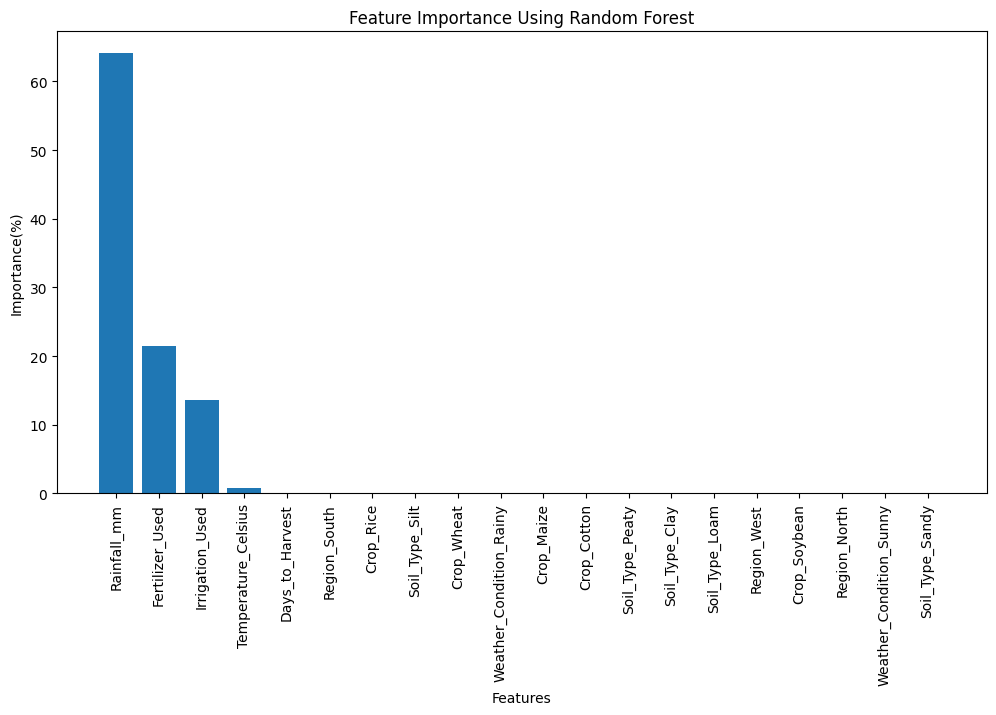

Selected features using Chi2: Index(['Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used',
       'Irrigation_Used', 'Days_to_Harvest'],
      dtype='object')


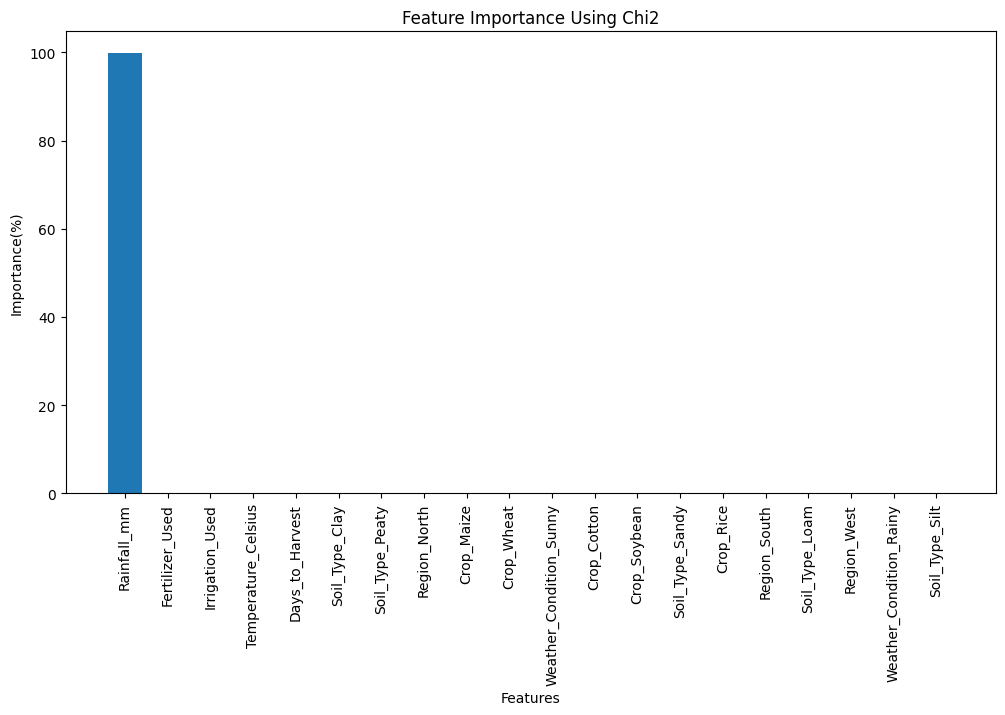

Selected features using Forward Selection: ('Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 'Irrigation_Used', 'Soil_Type_Silt')
Best feature using Forward Selection: Rainfall_mm


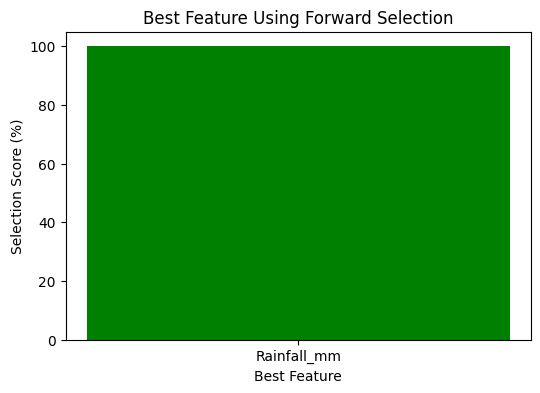

MAE: 0.4002333181059737
MSE: 0.2516346116908684
RMSE: 0.5016319484351733
R2: 0.9127161784900379
Model saved to random_forest_regressor_model.pkl


In [4]:
# Feature Engineering
data = pd.get_dummies(data, drop_first=True)
X = data.drop('Yield_tons_per_hectare', axis=1)
y = data['Yield_tons_per_hectare']

# Feature Selection using Random Forest
rfr = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=42, n_jobs=-1)
rfr.fit(X, y)
importances = rfr.feature_importances_
feature_names = X.columns
importances_percentage = (importances / np.sum(importances)) * 100
selector = SelectFromModel(estimator=rfr, threshold='mean', prefit=True)
selected_features_rf = X.columns[selector.get_support()]
print("Selected features using Random Forest:", selected_features_rf)

# Plot feature importances
plt.figure(figsize=(12, 6))
indices = np.argsort(importances_percentage)[::-1]
plt.bar(range(len(feature_names)), importances_percentage[indices], align='center')
plt.xticks(range(len(feature_names)), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance(%)")
plt.title("Feature Importance Using Random Forest")
plt.show()

# Feature Selection using Chi-Square Test
X_non_negative = X.apply(lambda x: x.clip(lower=0))
y_binned = pd.qcut(y, q=5, labels=False)
chi2_selector = SelectKBest(score_func=chi2, k=5)
X_kbest = chi2_selector.fit_transform(X_non_negative, y_binned)
selected_features_chi2 = X_non_negative.columns[chi2_selector.get_support()]
print("Selected features using Chi2:", selected_features_chi2)

# Plot Chi2 feature importances
chi2_scores = chi2_selector.scores_
chi2_scores_percentage = (chi2_scores / np.sum(chi2_scores)) * 100
plt.figure(figsize=(12, 6))
chi2_indices = np.argsort(chi2_scores_percentage)[::-1]
plt.bar(range(len(feature_names)), chi2_scores_percentage[chi2_indices], align='center')
plt.xticks(range(len(feature_names)), feature_names[chi2_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance(%)")
plt.title("Feature Importance Using Chi2")
plt.show()

# Wrapper Method: Forward Selection
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sfs = SequentialFeatureSelector(lr, k_features=5, forward=True, scoring='r2', cv=5)
sfs.fit(X_train, y_train)
selected_features_forward = sfs.k_feature_names_  # Correctly get the selected feature names
print("Selected features using Forward Selection:", selected_features_forward)
best_feature_forward = selected_features_forward[0]
print("Best feature using Forward Selection:", best_feature_forward)

# Plot the best feature only
plt.figure(figsize=(6, 4))
plt.bar(best_feature_forward, 100, color='green', align='center')
plt.xlabel("Best Feature")
plt.ylabel("Selection Score (%)")
plt.title("Best Feature Using Forward Selection")
plt.show()

# Model Creation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

# Evaluate the model
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

# Save the model using joblib
import joblib

# Save the trained model to a file
model_filename = 'random_forest_regressor_model.pkl'
joblib.dump(rf, model_filename)
print(f"Model saved to {model_filename}")

#loaded_model = joblib.load('random_forest_regressor_model.pkl')

Without rainfall as feature

Selected features using Random Forest: Index(['Fertilizer_Used', 'Irrigation_Used'], dtype='object')


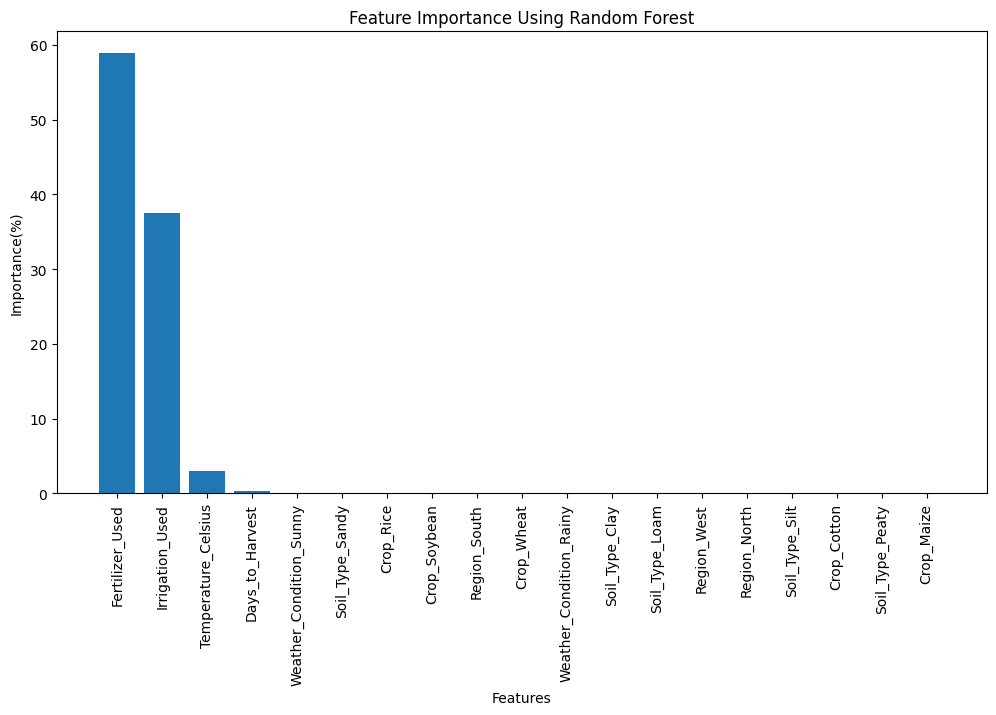

Selected features using Chi2: Index(['Temperature_Celsius', 'Fertilizer_Used', 'Irrigation_Used',
       'Days_to_Harvest', 'Soil_Type_Clay'],
      dtype='object')


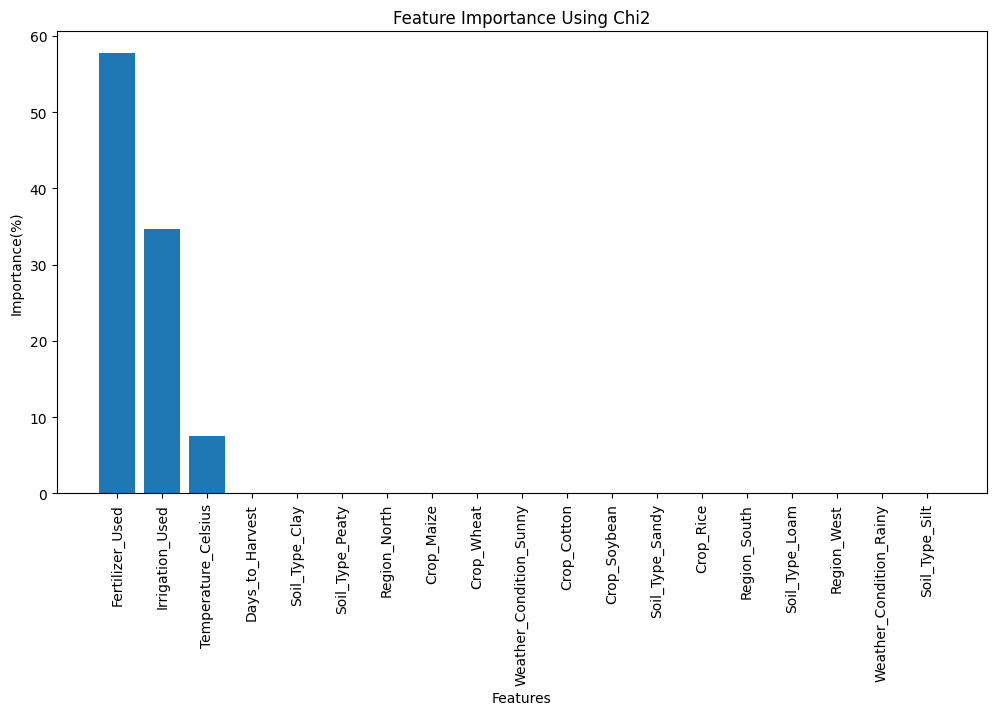

Selected features using Forward Selection: ('Temperature_Celsius', 'Fertilizer_Used', 'Irrigation_Used', 'Days_to_Harvest', 'Crop_Rice')
Best feature using Forward Selection: Temperature_Celsius


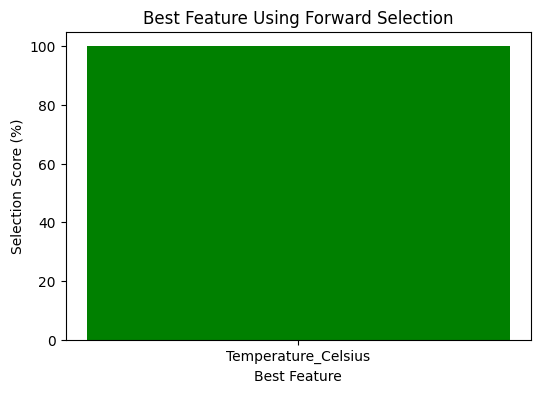

MAE: 1.18182742680554
MSE: 1.940394321032647
RMSE: 1.3929803735274402
R2: 0.32694063651298677
Model saved to random_forest_regressor_model_wo_rainfall.pkl


In [5]:
# Feature Engineering
data = pd.get_dummies(data, drop_first=True)
X = data.drop(['Yield_tons_per_hectare', 'Rainfall_mm'], axis=1)
y = data['Yield_tons_per_hectare']

# Feature Selection using Random Forest
rfr = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=42, n_jobs=-1)
rfr.fit(X, y)
importances = rfr.feature_importances_
feature_names = X.columns
importances_percentage = (importances / np.sum(importances)) * 100
selector = SelectFromModel(estimator=rfr, threshold='mean', prefit=True)
selected_features_rf = X.columns[selector.get_support()]
print("Selected features using Random Forest:", selected_features_rf)

# Plot feature importances
plt.figure(figsize=(12, 6))
indices = np.argsort(importances_percentage)[::-1]
plt.bar(range(len(feature_names)), importances_percentage[indices], align='center')
plt.xticks(range(len(feature_names)), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance(%)")
plt.title("Feature Importance Using Random Forest")
plt.show()

# Feature Selection using Chi-Square Test
X_non_negative = X.apply(lambda x: x.clip(lower=0))
y_binned = pd.qcut(y, q=5, labels=False)
chi2_selector = SelectKBest(score_func=chi2, k=5)
X_kbest = chi2_selector.fit_transform(X_non_negative, y_binned)
selected_features_chi2 = X_non_negative.columns[chi2_selector.get_support()]
print("Selected features using Chi2:", selected_features_chi2)

# Plot Chi2 feature importances
chi2_scores = chi2_selector.scores_
chi2_scores_percentage = (chi2_scores / np.sum(chi2_scores)) * 100
plt.figure(figsize=(12, 6))
chi2_indices = np.argsort(chi2_scores_percentage)[::-1]
plt.bar(range(len(feature_names)), chi2_scores_percentage[chi2_indices], align='center')
plt.xticks(range(len(feature_names)), feature_names[chi2_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance(%)")
plt.title("Feature Importance Using Chi2")
plt.show()

# Wrapper Method: Forward Selection
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sfs = SequentialFeatureSelector(lr, k_features=5, forward=True, scoring='r2', cv=5)
sfs.fit(X_train, y_train)
selected_features_forward = sfs.k_feature_names_  # Correctly get the selected feature names
print("Selected features using Forward Selection:", selected_features_forward)
best_feature_forward = selected_features_forward[0]
print("Best feature using Forward Selection:", best_feature_forward)

# Plot the best feature only
plt.figure(figsize=(6, 4))
plt.bar(best_feature_forward, 100, color='green', align='center')
plt.xlabel("Best Feature")
plt.ylabel("Selection Score (%)")
plt.title("Best Feature Using Forward Selection")
plt.show()

# Model Creation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

# Evaluate the model
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

# Save the model using joblib
import joblib

# Save the trained model to a file
model_filename = 'random_forest_regressor_model_wo_rainfall.pkl'
joblib.dump(rf, model_filename)
print(f"Model saved to {model_filename}")


#Without Fertilizer and Rainfall

Selected features using Random Forest: Index(['Temperature_Celsius', 'Irrigation_Used'], dtype='object')


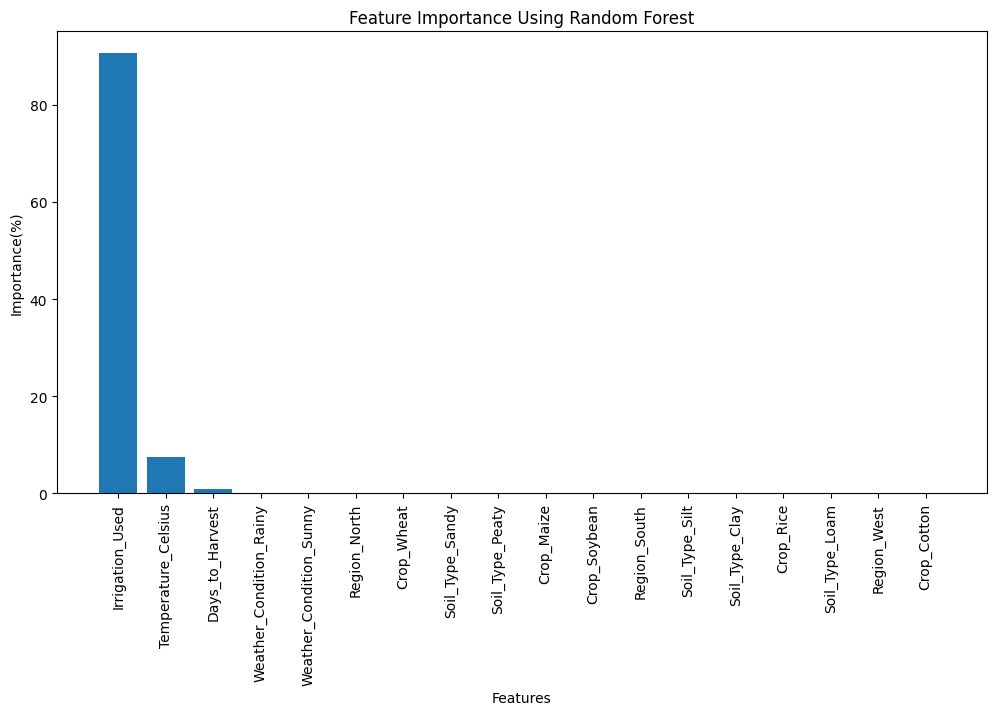

Selected features using Chi2: Index(['Temperature_Celsius', 'Irrigation_Used', 'Days_to_Harvest',
       'Soil_Type_Clay', 'Soil_Type_Peaty'],
      dtype='object')


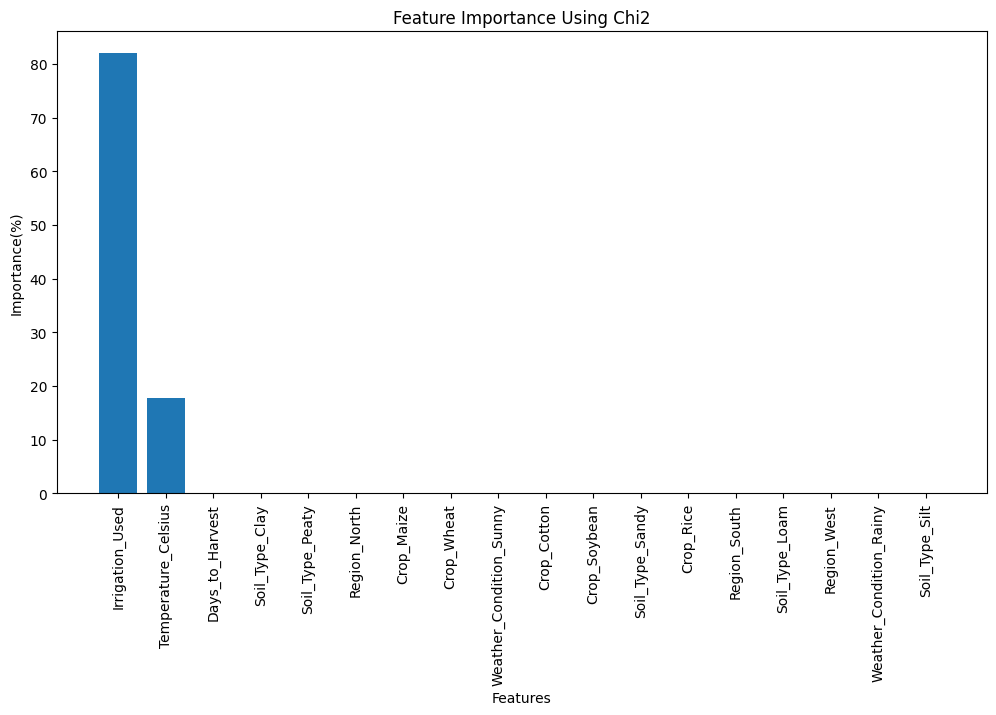

Selected features using Forward Selection: ('Temperature_Celsius', 'Irrigation_Used', 'Days_to_Harvest', 'Crop_Maize', 'Crop_Rice')
Best feature using Forward Selection: Temperature_Celsius


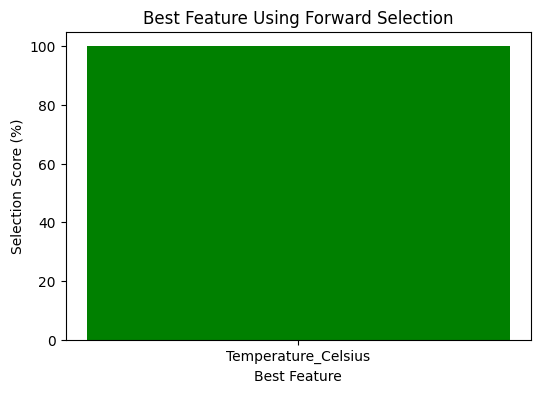

MAE: 1.305765521005969
MSE: 2.5004266047062544
RMSE: 1.5812737285828329
R2: 0.1326837433156608
Model saved to random_forest_regressor_model_wo_rainfallferti.pkl


In [6]:
# Feature Engineering
data = pd.get_dummies(data, drop_first=True)
X = data.drop(['Yield_tons_per_hectare', 'Rainfall_mm', 'Fertilizer_Used'], axis=1)
y = data['Yield_tons_per_hectare']

# Feature Selection using Random Forest
rfr = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=42, n_jobs=-1)
rfr.fit(X, y)
importances = rfr.feature_importances_
feature_names = X.columns
importances_percentage = (importances / np.sum(importances)) * 100
selector = SelectFromModel(estimator=rfr, threshold='mean', prefit=True)
selected_features_rf = X.columns[selector.get_support()]
print("Selected features using Random Forest:", selected_features_rf)

# Plot feature importances
plt.figure(figsize=(12, 6))
indices = np.argsort(importances_percentage)[::-1]
plt.bar(range(len(feature_names)), importances_percentage[indices], align='center')
plt.xticks(range(len(feature_names)), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance(%)")
plt.title("Feature Importance Using Random Forest")
plt.show()

# Feature Selection using Chi-Square Test
X_non_negative = X.apply(lambda x: x.clip(lower=0))
y_binned = pd.qcut(y, q=5, labels=False)
chi2_selector = SelectKBest(score_func=chi2, k=5)
X_kbest = chi2_selector.fit_transform(X_non_negative, y_binned)
selected_features_chi2 = X_non_negative.columns[chi2_selector.get_support()]
print("Selected features using Chi2:", selected_features_chi2)

# Plot Chi2 feature importances
chi2_scores = chi2_selector.scores_
chi2_scores_percentage = (chi2_scores / np.sum(chi2_scores)) * 100
plt.figure(figsize=(12, 6))
chi2_indices = np.argsort(chi2_scores_percentage)[::-1]
plt.bar(range(len(feature_names)), chi2_scores_percentage[chi2_indices], align='center')
plt.xticks(range(len(feature_names)), feature_names[chi2_indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance(%)")
plt.title("Feature Importance Using Chi2")
plt.show()

# Wrapper Method: Forward Selection
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sfs = SequentialFeatureSelector(lr, k_features=5, forward=True, scoring='r2', cv=5)
sfs.fit(X_train, y_train)
selected_features_forward = sfs.k_feature_names_  # Correctly get the selected feature names
print("Selected features using Forward Selection:", selected_features_forward)
best_feature_forward = selected_features_forward[0]
print("Best feature using Forward Selection:", best_feature_forward)

# Plot the best feature only
plt.figure(figsize=(6, 4))
plt.bar(best_feature_forward, 100, color='green', align='center')
plt.xlabel("Best Feature")
plt.ylabel("Selection Score (%)")
plt.title("Best Feature Using Forward Selection")
plt.show()

# Model Creation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

# Evaluate the model
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

# Save the model using joblib
import joblib

# Save the trained model to a file
model_filename = 'random_forest_regressor_model_wo_rainfallferti.pkl'
joblib.dump(rf, model_filename)
print(f"Model saved to {model_filename}")


#Model Creation (With Rainfall)

In [ ]:
# Import necessary libraries
from pycaret.regression import *

# Initialize the setup for the model with Rainfall_mm
setup_with_rainfall = setup(data=data, target='Yield_tons_per_hectare', session_id=123, normalize=True, transformation=True, remove_outliers=True)

# Compare different models with Rainfall_mm``
best_model_with_rainfall = compare_models()

,Description,Value
0,Session id,123
1,Target,Yield_tons_per_hectare
2,Target type,Regression
3,Original data shape,"(1000000, 10)"
4,Transformed data shape,"(965000, 25)"
5,Transformed train set shape,"(665000, 25)"
6,Transformed test set shape,"(300000, 25)"
7,Numeric features,3
8,Categorical features,4
9,Preprocess,True


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:34:33
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.4046,0.2572,0.5072,0.9106,0.1078,0.1256,5.5600
ridge,Ridge Regression,0.4046,0.2572,0.5072,0.9106,0.1078,0.1256,4.6630
lar,Least Angle Regression,0.4046,0.2572,0.5072,0.9106,0.1078,0.1256,4.6380
br,Bayesian Ridge,0.4046,0.2572,0.5072,0.9106,0.1078,0.1256,5.0530
huber,Huber Regressor,0.4046,0.2572,0.5072,0.9106,0.1078,0.1256,5.3370
rf,Random Forest Regressor,0.4116,0.2663,0.5160,0.9075,0.1095,0.1303,85.5040
knn,K Neighbors Regressor,0.4656,0.3414,0.5843,0.8814,0.1233,0.1491,37.4140
par,Passive Aggressive Regressor,0.5395,0.4570,0.6741,0.8412,0.1439,0.1596,4.9000
dt,Decision Tree Regressor,0.5826,0.5321,0.7294,0.8152,0.1545,0.1746,6.2210
omp,Orthogonal Matching Pursuit,0.6666,0.6373,0.7983,0.7786,0.1667,0.2106,4.8200


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

#Model Creation (Without Rainfall)

In [ ]:
# Import necessary libraries
from pycaret.regression import *

# Initialize the setup for the model without Rainfall_mm
data_without_rainfall = data.drop('Rainfall_mm', axis=1)
setup_without_rainfall = setup(data=data_without_rainfall, target='Yield_tons_per_hectare', session_id=123, normalize=True, transformation=True, remove_outliers=True)

# Compare different models without Rainfall_mm
best_model_without_rainfall = compare_models()

,Description,Value
0,Session id,123
1,Target,Yield_tons_per_hectare
2,Target type,Regression
3,Original data shape,"(1000000, 9)"
4,Transformed data shape,"(965002, 24)"
5,Transformed train set shape,"(665002, 24)"
6,Transformed test set shape,"(300000, 24)"
7,Numeric features,2
8,Categorical features,4
9,Preprocess,True


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:25:08
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,1.1805,1.9364,1.3916,0.3273,0.2805,0.3941,5.5210
ridge,Ridge Regression,1.1805,1.9364,1.3915,0.3273,0.2805,0.3941,4.4200
lar,Least Angle Regression,1.1805,1.9364,1.3915,0.3273,0.2805,0.3941,4.5170
br,Bayesian Ridge,1.1805,1.9364,1.3915,0.3273,0.2805,0.3941,4.6760
huber,Huber Regressor,1.1805,1.9364,1.3916,0.3273,0.2805,0.3941,4.7860
omp,Orthogonal Matching Pursuit,1.1851,1.9566,1.3988,0.3203,0.2820,0.3974,4.4220
rf,Random Forest Regressor,1.2083,2.0629,1.4363,0.2834,0.2880,0.4006,87.0470
knn,K Neighbors Regressor,1.2660,2.3234,1.5243,0.1929,0.3033,0.4126,36.3400
en,Elastic Net,1.3230,2.5800,1.6062,0.1037,0.3249,0.4829,4.5800
lasso,Lasso Regression,1.3891,2.8787,1.6967,-0.0000,0.3406,0.5091,4.4050


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

#Model Creation (Without Fertilizer)

In [ ]:
# Import necessary libraries
from pycaret.regression import *

# Drop the features "Rainfall_mm" and "Fertilizer_Used" from the dataset
data = data.drop(columns=['Rainfall_mm', 'Fertilizer_Used'])

# Initialize the setup for the model without Rainfall_mm and Fertilizer_Used
setup_without_rainfall = setup(data=data, target='Yield_tons_per_hectare', session_id=123, normalize=True, transformation=True, remove_outliers=True)

# Compare different models without Rainfall_mm and Fertilizer_Used
best_model_without_rainfall = compare_models()